<div class="alert alert-block" style="border: 1px solid #455A64;background-color:#ECEFF1;">
본 자료 및 영상 컨텐츠는 저작권법 제25조 2항에 의해 보호를 받습니다. 본 컨텐츠 및 컨텐츠 일부 문구등을 외부에 공개, 게시하는 것을 금지합니다. 특히 자료에 대해서는 저작권법을 엄격하게 적용하겠습니다.
</div>

### Feature Engineering: Feature Transformation Practice

In [2]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

model만 아무리 좋아봤자 탐색이 똑바로 되지 못하면 아무런 의미없다.

### 1. 합치기

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
df = pd.concat((train, test))

In [12]:
ntest

418

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Sex, Embarked 는 쉽기 때문에, 먼저 진행

### 2. Sex 숫자 변환

In [7]:
df["Sex"].isnull().sum()

0

In [8]:
gender = { "male": 0, "female": 1 } # 사전 데이터를 만든 후에
df['Sex'] = df['Sex'].map(gender) # map 함수를 사용

### 3. Pclass 는 변경할 필요 없음
- Pclass 값이 1, 2, 3

### 4. Embarked 정보를 숫자로 바꾸기

In [13]:
df['Embarked'].isnull().sum() # 결측치 확인

2

In [14]:
df['Embarked'].value_counts() # level 값 확인

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [17]:
df.loc[(df['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
df.sort_values(['Ticket'], ascending = True)[55:70] # 티켓 순서가 Embarked에 영향을 미칠 수도 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
252,253,0.0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
802,803,1.0,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
390,391,1.0,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
435,436,1.0,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S


In [18]:
df.loc[(df['Embarked'].isnull()), 'Embarked'] = 'S' #(조건,해당 행) = 채워넣는 이름

In [19]:
df_temp1 = df.copy() #원본데이터를 복사.

In [20]:
gender = { "S": 0, "C": 1, "Q":2 }
df_temp1['Embarked'] = df_temp1['Embarked'].map(gender)

In [21]:
df_temp1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


### 참고: pandas.factorize() 
- 데이터의 범주가 많아서, 일일이 각 데이터를 숫자로 기재해주기 어려운 경우에 사용

In [24]:
df_temp2 = df.copy()

In [25]:
df_temp2['Embarked'].factorize()

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 Index(['S', 'C', 'Q'], dtype='object'))

In [26]:
df_temp2['Embarked'].factorize()[0] #배열 리스트가 0,1,2로 나뉘어지기 떄문

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
df_temp2['Embarked'] = df_temp2['Embarked'].factorize()[0]

In [28]:
df_temp2['Embarked'].value_counts() # level 값 확인

0    916
1    270
2    123
Name: Embarked, dtype: int64

### 각 범주의 의미를 기록해놓기 위해, 직접 기입하기로 함

In [29]:
gender = { "S": 0, "C": 1, "Q":2 }
df['Embarked'] = df['Embarked'].map(gender)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


### 5. Name 
- 참고: 여기서 부터 시작한다면, 처음부터 여기까지 코드 실행을 한 후에, 진행해야 df 에 지금까지 변환된 데이터프레임이 들어감

In [31]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [37]:
df['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Lady          7
Col           4
Major         2
Don           1
Sir           1
Capt          1
Jonkheer      1
Dona          1
Name: Initial, dtype: int64

- Ms. 는 당시에는 귀족 미망인을 의미함
- Mlle나 Mme등도 마드모아젤과 마담의 줄인말로, 귀족 여성을 의미함
- Countess 는 백작 부인을 의미하므로, 귀족 여성을 의미함
- Lady 도 귀족 부인을 의미함

In [34]:
df[(df['Initial'] == 'Mme') | (df['Initial'] == 'Mlle') | (df['Initial'] == 'Ms') | (df['Initial'] == 'Countess') | (df['Initial'] == 'Lady')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
369,370,1.0,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,1,Mme
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,0,Ms
556,557,1.0,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,1,Lady
641,642,1.0,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,1,Mlle
710,711,1.0,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,1,Mlle
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,0,Countess
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,2,Ms


In [35]:
df.loc[(df['Initial'] == 'Mme') | (df['Initial'] == 'Mlle') | (df['Initial'] == 'Ms') | (df['Initial'] == 'Countess') | (df['Initial'] == 'Lady'), 'Initial'] = 'Lady'

In [38]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Lady': 4, 'Don': 5, 'Rev': 6, 'Dr': 7, 
                 'Major': 8, 'Sir': 9, 'Col': 10,  'Capt': 11, 'Jonkheer': 12}
df['Initial'] = df['Initial'].map(title_mapping)

In [39]:
df[df['Initial'] == 3] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0,3.0
16,17,0.0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,2,3.0
50,51,0.0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,0,3.0
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,0,3.0
63,64,0.0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,0,3.0
379,1271,NaN,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,0,3.0
389,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,0,3.0
392,1284,NaN,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,0,3.0


In [40]:
drop_features = ['Name']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0.0


### 6. Age 
- 결측치 보완
- 범위별 숫자 변환

In [41]:
df['Age'].isnull().sum() # 결측치 확인

263

In [42]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Lady': 4, 'Don': 5, 'Rev': 6, 'Dr': 7, 
                 'Major': 8, 'Sir': 9, 'Col': 10,  'Capt': 11, 'Jonkheer': 12}
df.groupby('Initial').agg({'Age': ['mean', 'median', 'count']}) # agg 함수 기억하자! 행들의 평균 미디언 개수 구해주는 함수

Age             
              mean median count
Initial                        
0.0      32.252151   29.0   581
1.0      21.774238   22.0   210
2.0      36.994118   35.5   170
3.0       5.482642    4.0    53
4.0      30.166667   26.0     6
5.0      40.000000   40.0     1
6.0      41.250000   41.5     8
7.0      43.571429   49.0     7
8.0      48.500000   48.5     2
9.0      49.000000   49.0     1
10.0     54.000000   54.5     4
11.0     70.000000   70.0     1
12.0     38.000000   38.0     1

In [43]:
df["Age"].fillna(df.groupby("Initial")["Age"].transform("median"), inplace=True)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0.0


### 참고: Violin Plot
- 대략적인 비율 비교를 위한 특별한 그래프 형태

> 이 비율을 참고해서, 나잇대를 숫자로 변경하기로 함

In [45]:
train = df[:ntrain]

In [51]:
import plotly.express as px #
fig = px.violin(train, y="Age", color="Survived", violinmode='overlay')
fig.show()

> 참고: Kernel Density Estimation (커널 밀도 추정) 에 의해, 마이너스 나잇대에 대한 추정 밀도값도 표현됨
> https://darkpgmr.tistory.com/147

### 각 나잇대를 숫자로 변경해보기 카테고리화로 설정
  - baby (2살 이하): 0
  - child (15살 이하): 1 
  - young (20살 이하): 2  
  - mid-age (33살 이하): 3  
  - junior (43살 이하): 4
  - senior (60살 이하): 5
  - old (75살 이하): 6
  - too old (75살 이상): 7

In [52]:
# 시각화 값에 딱 맞게 설정하는 것은 학습 데이터(train)에만 잘 맞는 overfitting 현상이 발생할 수 있으므로 적절히 적용
df.loc[df['Age'] <= 2, 'Age'] = 0
df.loc[(df['Age'] > 2) & (df['Age'] <= 15), 'Age'] = 1
df.loc[(df['Age'] > 15) & (df['Age'] <= 20), 'Age'] = 2
df.loc[(df['Age'] > 20) & (df['Age'] <= 33), 'Age'] = 3
df.loc[(df['Age'] > 33) & (df['Age'] <= 43), 'Age'] = 4
df.loc[(df['Age'] > 43) & (df['Age'] <= 60), 'Age'] = 5
df.loc[(df['Age'] > 60) & (df['Age'] <= 75), 'Age'] = 6
df.loc[ df['Age'] > 75, 'Age'] = 7

In [53]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,male,3.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,female,4.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,female,4.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,male,4.0,0,0,373450,8.0500,NaN,0,0.0


### 7. Fare

In [54]:
survived = train[train['Survived'] == 1]['Fare'] 
dead = train[train['Survived'] == 0]['Fare']
temp = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])

In [55]:
temp.iplot(kind='histogram', bins=(0, 600, 20))

In [56]:
# test 데이터는 결측치가 있음을 확인
df['Fare'].isnull().sum() 

1

In [57]:
# 아무래도 Pclass 에 따라, 요금이 결정될 가능성이 높으므로
df['Fare'].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

> 요금을 더 세분화해도, 요금에 따른 경향성은 일정 요금 이상(약 50), 이하에서만 나타나는 것을 EDA 를 통해, 이해하였고, <br>
> 실제 요금 데이터에 대한 이해를 통해서도, 특정 세분화된 요금 구간만, 다른 경향을 보이지는 않을 것이라 예측되므로, <br>
> 매우 세분화할 필요는 없어보였음

In [58]:
df.loc[ df['Fare'] <= 20, 'Fare'] = 0
df.loc[(df['Fare'] > 20) & (df['Fare'] <= 40), 'Fare'] = 1
df.loc[(df['Fare'] > 40) & (df['Fare'] <= 60), 'Fare'] = 2
df.loc[(df['Fare'] > 60) & (df['Fare'] <= 80), 'Fare'] = 3
df.loc[(df['Fare'] > 80) & (df['Fare'] <= 100), 'Fare'] = 4
df.loc[ df['Fare'] > 100, 'Fare'] = 5

In [59]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,male,3.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1.0,1,female,4.0,1,0,PC 17599,3.0,C85,1,2.0
2,3,1.0,3,female,3.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1.0,1,female,4.0,1,0,113803,2.0,C123,0,2.0
4,5,0.0,3,male,4.0,0,0,373450,0.0,NaN,0,0.0


### 8. SibSp + Parch 
- EDA 를 통해, SibSp 와 Parch 를 별도로 구분할 때보다, 합쳤을 때, 보다 경향성이 보였으므로, 합치기로 함

In [60]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [61]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,male,3.0,1,0,A/5 21171,0.0,NaN,0,0.0,2
1,2,1.0,1,female,4.0,1,0,PC 17599,3.0,C85,1,2.0,2
2,3,1.0,3,female,3.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0,1
3,4,1.0,1,female,4.0,1,0,113803,2.0,C123,0,2.0,2
4,5,0.0,3,male,4.0,0,0,373450,0.0,NaN,0,0.0,1


In [62]:
drop_features = ['SibSp', 'Parch']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,male,3.0,A/5 21171,0.0,NaN,0,0.0,2
1,2,1.0,1,female,4.0,PC 17599,3.0,C85,1,2.0,2
2,3,1.0,3,female,3.0,STON/O2. 3101282,0.0,NaN,0,1.0,1
3,4,1.0,1,female,4.0,113803,2.0,C123,0,2.0,2
4,5,0.0,3,male,4.0,373450,0.0,NaN,0,0.0,1


### 9. Cabin

In [64]:
!pip install missingno

<AxesSubplot:>

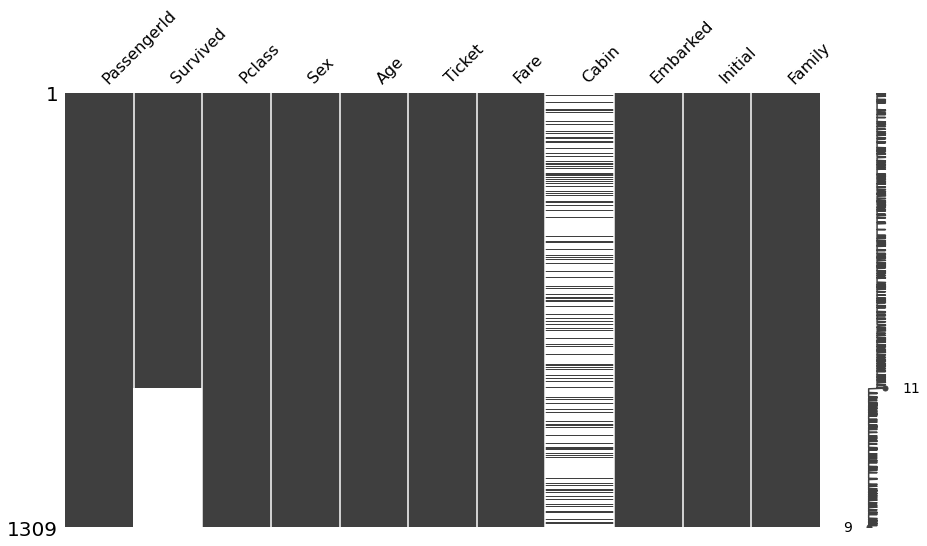

In [66]:
import missingno #결측치 찾을 때 한번에 사용하기 딱 좋다!
missingno.matrix(df, figsize = (15,8))

In [67]:
df['Cabin'].unique() # level 값 확인

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [68]:
df['Cabin'] = df['Cabin'].fillna('U')  # Unknown 의 약자로 U 로 구분해서 넣기

In [69]:
df['Cabin'] = df['Cabin'].str[0] # 각 컬럼값을 문자열로 추출해서, 첫 글자로 대입

In [70]:
df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [71]:
df[df['Cabin'] == 'U']['Ticket'] # Ticket 으로 Cabin 예측은 어려워보임

0               A/5 21171
2        STON/O2. 3101282
4                  373450
5                  330877
7                  349909
              ...        
412                347086
413             A.5. 3236
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1014, dtype: object

In [72]:
train = df[:ntrain]

In [73]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

survived = train[train['Survived'] == 1]['Cabin'] 
dead = train[train['Survived'] == 0]['Cabin']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

> 이렇게 처리해보니, 경향성이 있어 보임

In [508]:
df['Cabin'] = df['Cabin'].factorize()[0]

In [509]:
df.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1
5,6,0.0,3,0,3.0,330877,0.0,0,2,0.0,1
6,7,0.0,1,0,5.0,17463,2.0,2,0,0.0,1
7,8,0.0,3,0,0.0,349909,1.0,0,0,3.0,5
8,9,1.0,3,1,3.0,347742,0.0,0,0,2.0,3
9,10,1.0,2,1,1.0,237736,1.0,0,1,2.0,2


### 10. Ticket

In [510]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [511]:
df['Ticket_Initial'] = df['Ticket'].str.extract('([^ \t\n\r\f\v]+) ')

In [512]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,NaN


In [513]:
df['Ticket_Num'] = df['Ticket'].str.extract('( [^ \t\n\r\f\v]+)')

In [514]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,21171
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,17599
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,3101282
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,NaN,NaN


In [515]:
df['Ticket_Num'] = df['Ticket_Num'].fillna(df['Ticket'])

In [516]:
df[df['Ticket_Num'] == 'LINE']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
179,180,0.0,3,0,4.0,LINE,0.0,0,0,0.0,1,NaN,LINE
271,272,1.0,3,0,3.0,LINE,0.0,0,0,0.0,1,NaN,LINE
302,303,0.0,3,0,2.0,LINE,0.0,0,0,0.0,1,NaN,LINE
597,598,0.0,3,0,5.0,LINE,0.0,0,0,0.0,1,NaN,LINE


In [517]:
df.loc[(df['Ticket_Num'] == 'LINE'),'Ticket_Initial']= 'LINE'
df.loc[(df['Ticket_Num'] == 'LINE'),'Ticket_Num']= 0

In [518]:
df[df['Ticket_Initial'] == 'LINE']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
179,180,0.0,3,0,4.0,LINE,0.0,0,0,0.0,1,LINE,0
271,272,1.0,3,0,3.0,LINE,0.0,0,0,0.0,1,LINE,0
302,303,0.0,3,0,2.0,LINE,0.0,0,0,0.0,1,LINE,0
597,598,0.0,3,0,5.0,LINE,0.0,0,0,0.0,1,LINE,0


In [440]:
df[df['Ticket_Num'] == ' Basle']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
473,474,1.0,2,1,3.0,SC/AH Basle 541,0.0,4,1,2.0,1,SC/AH,Basle


In [519]:
df.loc[(df['Ticket_Num'] == ' Basle'), 'Ticket_Num'] = 541

In [520]:
df[df['Ticket_Num'] == ' Basle']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num


- str.replace( ) 함수는 조건에 맞는 것을 다른 것으로 대체 해주는 함수.
- '[^A-Za-z]' 는 알파벳 문자가 아닌 문자를 뜻하는 정규 표현식.
- repl = '' 이건 제거하겠다는 의미, 만약 ' '면 공백으로 대체됨.
- regex=True 이거는 꼭 작성해줘야 정규표현식이 작동함.

In [528]:
df['Ticket_Initial_Test'] = df['Ticket_Initial'].str.replace(pat='[^A-Za-z]', repl='', regex=True)

In [529]:
df['Ticket_Initial2'] = df['Ticket_Initial'].str.replace(pat='[^A-Za-z]', repl='', regex=True).str[0:2]

In [530]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_Initial_Test,Ticket_Initial2
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,21171,A,A
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,17599,PC,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,3101282,STONO,ST
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,NaN,113803,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,NaN,373450,NaN,NaN


In [531]:
train = df[:ntrain]

In [532]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

survived = train[train['Survived'] == 1]['Ticket_Initial2'] 
dead = train[train['Survived'] == 0]['Ticket_Initial2']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

In [533]:
df['Ticket_Initial2'].isnull().sum()

957

In [534]:
df['Ticket_Initial2'] = df['Ticket_Initial2'].fillna('UN')
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
train = df[:ntrain]
survived = train[train['Survived'] == 1]['Ticket_Initial2'] 
dead = train[train['Survived'] == 0]['Ticket_Initial2']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

In [535]:
df['Ticket_Initial2'] = df['Ticket_Initial2'].factorize()[0]

### qcut() 과 cut()
- pandas.qcut(나눌데이터컬럼, q=나눌 수, labels=각그룹이름(배열) 또는 False)
  - 나눌데이터컬럼값의 분포를 기반으로, 균등 사이즈로 각 그룹으로 나눔
- pandas.cut(나눌데이터컬럼, 나눌 수)
  - 나눌데이터컬럼값을 기반으로 동일한 범위로, 각 그룹을 나눔

In [536]:
df['Ticket_Num_Cut'] = df['Ticket_Num'].astype('float')

In [537]:
df['Ticket_Num_Cut'] = pd.qcut(df['Ticket_Num_Cut'], q=10, labels=False)

In [538]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_Initial_Test,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,21171,A,0,3
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,17599,PC,1,3
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,3101282,STONO,2,9
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,NaN,113803,NaN,3,5
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,NaN,373450,NaN,3,9


In [539]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
train = df[:ntrain]
survived = train[train['Survived'] == 1]['Ticket_Num_Cut'] 
dead = train[train['Survived'] == 0]['Ticket_Num_Cut']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

> 이정도 하면 경향성이 다소 보임

In [373]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_Initial_Test,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,21171,A,0,3
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,17599,PC,1,3
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,3101282,STONO,2,9
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,NaN,113803,NaN,3,5
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,NaN,373450,NaN,3,9


In [540]:
drop_features = ['Ticket', 'Ticket_Initial_Test', 'Ticket_Initial', 'Ticket_Num']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,0.0,0,0,0.0,2,0,3
1,2,1.0,1,1,4.0,3.0,1,1,2.0,2,1,3
2,3,1.0,3,1,3.0,0.0,0,0,1.0,1,2,9
3,4,1.0,1,1,4.0,2.0,1,0,2.0,2,3,5
4,5,0.0,3,0,4.0,0.0,0,0,0.0,1,3,9


### pickle 
- 데이터 구조나 객체등 어떤 데이터도 파일로 저장하고, 읽을 수 있음
- 리스트를 저장하면, 해당 파일을 읽어서, 리스트 변수에 값을 넣을 수 있음

In [541]:
import pickle

#### pickle 사용법1: 파일에 저장된 리스트 데이터 읽어서, datas1 변수에 넣기
- 파일 위치에는 전체 디렉토리와 해당 파일명까지 써주거나, 
- 파일명만 써주면, 주피터 노트북이 실행되는 해당 폴더 안에 있는 파일을 의미함

```python
with open(파일위치, 'rb') as pickle_filename:
    datas1 = pickle.load(pickle_filename)
```

#### pickle 사용법2: 파일에 리스트 변수의 데이터를 저장하기

```python
with open(파일위치, 'wb') as pickle_filename:
    pickle.dump(datas1, pickle_filename)
```

In [542]:
import pickle
with open('titanic_step1_feature_change.pickle', 'wb') as pickle_filename:
    pickle.dump(df, pickle_filename)

<div class="alert alert-block" style="border: 1px solid #455A64;background-color:#ECEFF1;">
본 자료 및 영상 컨텐츠는 저작권법 제25조 2항에 의해 보호를 받습니다. 본 컨텐츠 및 컨텐츠 일부 문구등을 외부에 공개, 게시하는 것을 금지합니다. 특히 자료에 대해서는 저작권법을 엄격하게 적용하겠습니다.
</div>